<img src="CBMM-logo-screen-RGB-colour-optimized.svg" style="width:200px">

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
   

     
   
<h1> Using the Allen SDK to find and access data </h1>

<h3> Brain, Minds, & Machines 2019 Tutorial, Sunday, August 11, 2019 </h3>

In this tutorial, we are going to explore how to access calcium imaging data from the Allen Brain Observatory through the AllenSDK.  You will learn how to download datasets as well as how to access important components of the data such as dF/F traces and metadata for the experimental sessions, among other things.

Prerequesites:

EITHER

- a Python environment (we suggest Anaconda:  https://www.anaconda.com/distribution/)


- Install allensdk: http://alleninstitute.github.io/AllenSDK/install.html
``` 
$ pip install allensdk```

OR

- Spin up AWS instance: https://github.com/AllenInstitute/AllenSDK/wiki/Use-the-Allen-Brain-Observatory-%E2%80%93-Visual-Coding-on-AWS

(Note:  if you work through the tutorials locally, i.e. not using AWS, you will be downloading datasets to your local drive.  This can be slow.)


<h2> Today's Tutorial FIX </h2>

1. Getting information about available data sets.
2. Get data for an experiment.
3. Finding data for specific cells.
4. (BONUS!) Accessing calcium movies.
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> 1. Getting information about available data sets </h2>

The main entry point is the `BrainObservatoryCache` class.  This class is responsible for downloading any requested data or metadata as needed and storing it in a specified location.  With this class, you can query for available experiments by features such as area, depth, and imaging target.

We begin by importing the `BrainObservatoryCache` class and instantiating it, pointing it to our "manifest file" with the optional variable `manifest_file`.

`manifest_file` is a path to the manifest file.  This folder containing this file is where you will store and access the data.
</div>

In [2]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

In [3]:
# use the following path for AWS
DATA_DIR = '/data/allen-brain-observatory/visual-coding-2p/'

# uncomment and put your own path here for your local machine; 
# leave as is (DATA_DIR = '') to use the working directory from which you launched jupyter
# DATA_DIR = ''

boc = BrainObservatoryCache(manifest_file=os.path.join(DATA_DIR, 'manifest.json'))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
The Brain Observatory Cache allows us to understand the dimensions of the data in the dataset, i.e. the conditions under which each experiment was acquired.

Let's take a look at the available **depths**, **cre lines**, **areas**, and **stimuli** available in the Brain Observatory dataset.
</div>

In [4]:
# list of all targeted areas, using Allen Brain Atlas nomenclature
boc.get_all_targeted_structures()

['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']

In [5]:
# list of all imaging depths
boc.get_all_imaging_depths()

[175,
 185,
 195,
 200,
 205,
 225,
 250,
 265,
 275,
 276,
 285,
 300,
 320,
 325,
 335,
 350,
 365,
 375,
 390,
 400,
 550,
 570,
 625]

In [6]:
# list of all cre driver lines 
boc.get_all_cre_lines()

['Cux2-CreERT2',
 'Emx1-IRES-Cre',
 'Fezf2-CreER',
 'Nr5a1-Cre',
 'Ntsr1-Cre_GN220',
 'Pvalb-IRES-Cre',
 'Rbp4-Cre_KL100',
 'Rorb-IRES2-Cre',
 'Scnn1a-Tg3-Cre',
 'Slc17a7-IRES2-Cre',
 'Sst-IRES-Cre',
 'Tlx3-Cre_PL56',
 'Vip-IRES-Cre']

In [7]:
# list of all GCaMP reporter lines
boc.get_all_reporter_lines()

['Ai148(TIT2L-GC6f-ICL-tTA2)',
 'Ai162(TIT2L-GC6s-ICL-tTA2)',
 'Ai93(TITL-GCaMP6f)',
 'Ai93(TITL-GCaMP6f)-hyg',
 'Ai94(TITL-GCaMP6s)']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
The **"f"** means **fast**. The **"s"** means **slow**.

</div>

In [8]:
# list of all stimuli
boc.get_all_stimuli()

['drifting_gratings',
 'locally_sparse_noise',
 'locally_sparse_noise_4deg',
 'locally_sparse_noise_8deg',
 'natural_movie_one',
 'natural_movie_three',
 'natural_movie_two',
 'natural_scenes',
 'spontaneous',
 'static_gratings']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h3> Experiment containers & sessions </h3>

The experiment container describes a set of 3 experiment sessions performed for the same field of view (ie. same targeted area and imaging depth in the same mouse that targets the same set of cells). Each experiment container has a unique ID number.

</div>

> Choose a visual area and Cre line from the lists above

In [9]:
visual_area = 'VISp'
cre_line ='Cux2-CreERT2'

> Get the list of all the experiment containers for that area and Cre line combination.

In [10]:
exps = boc.get_experiment_containers(
    targeted_structures=[visual_area], 
    cre_lines=[cre_line],
)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Note:  This command does not retrieve the data istelf.  It downloads a data structure containing information regarding the specified experiment containers.  It returns a list of dictionaries.

</div>

In [11]:
exps

[{'id': 511510736,
  'imaging_depth': 175,
  'targeted_structure': 'VISp',
  'cre_line': 'Cux2-CreERT2',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'donor_name': '222426',
  'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
  'tags': [],
  'failed': False},
 {'id': 511510855,
  'imaging_depth': 175,
  'targeted_structure': 'VISp',
  'cre_line': 'Cux2-CreERT2',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'donor_name': '229106',
  'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-229106',
  'tags': [],
  'failed': False},
 {'id': 511509529,
  'imaging_depth': 175,
  'targeted_structure': 'VISp',
  'cre_line': 'Cux2-CreERT2',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'donor_name': '222420',
  'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-222420',
  'tags': [],
  'failed': False},
 {'id': 511507650,
  'imaging_depth': 175,
  'targeted_structure': 'VISp',
  'cre_line': 'Cux2-CreERT2',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'donor_name': '222424',
  'specimen_name': 'Cux2-CreERT2;Cam

In [12]:
exps = pd.DataFrame(exps)
exps

,cre_line,donor_name,failed,id,imaging_depth,reporter_line,specimen_name,tags,targeted_structure
0,Cux2-CreERT2,222426,False,511510736,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222426,[],VISp
1,Cux2-CreERT2,229106,False,511510855,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-229106,[],VISp
2,Cux2-CreERT2,222420,False,511509529,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222420,[],VISp
3,Cux2-CreERT2,222424,False,511507650,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222424,[],VISp
4,Cux2-CreERT2,225037,False,511510699,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-225037,[],VISp
5,Cux2-CreERT2,382421,False,702934962,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-382421,[],VISp
6,Cux2-CreERT2,348262,False,645413757,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-348262,[],VISp
7,Cux2-CreERT2,360565,False,659767480,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-360565,[],VISp
8,Cux2-CreERT2,222425,False,511510650,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222425,[],VISp
9,Cux2-CreERT2,390323,False,712178509,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-390323,[],VISp


> Let's look at one experiment container, imaged from Cux2, in VISp, from imaging depth 175 um.

In [13]:
experiment_container_id = 511510736

In [14]:
exp_cont = boc.get_ophys_experiments(
    experiment_container_ids=[experiment_container_id],
)
pd.DataFrame(exp_cont)

,acquisition_age_days,cre_line,donor_name,experiment_container_id,fail_eye_tracking,id,imaging_depth,reporter_line,session_type,specimen_name,targeted_structure
0,104,Cux2-CreERT2,222426,511510736,True,501704220,175,Ai93(TITL-GCaMP6f),three_session_A,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,VISp
1,103,Cux2-CreERT2,222426,511510736,True,501559087,175,Ai93(TITL-GCaMP6f),three_session_B,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,VISp
2,102,Cux2-CreERT2,222426,511510736,True,501474098,175,Ai93(TITL-GCaMP6f),three_session_C,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,VISp


!['Diagram of containers'](http://alleninstitute.github.io/AllenSDK/_static/container_session_layout.png)

In [15]:
exp_cont_ns = boc.get_ophys_experiments(
    experiment_container_ids=[experiment_container_id], 
    stimuli=['natural_scenes'],
)
pd.DataFrame(exp_cont_ns)

,acquisition_age_days,cre_line,donor_name,experiment_container_id,fail_eye_tracking,id,imaging_depth,reporter_line,session_type,specimen_name,targeted_structure
0,103,Cux2-CreERT2,222426,511510736,True,501559087,175,Ai93(TITL-GCaMP6f),three_session_B,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,VISp


In [17]:
session_id = exp_cont_ns[0]['id']
print(session_id)

501559087


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> 2. Get data for an experiment </h2>

The Ophys Experiment data object gives us access to everything in the NWB file for a single imaging session.

Note:  if you are following along on your own machine, the following command will download data if it has not been previously retrieved.  You should see a warning to this effect.

</div>

In [18]:
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

2019-08-09 08:59:34,334 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/514429113
/Users/michaelbu/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


> Use tab completion in the cell below to examine the methods that begin with 'get_'.

In [19]:
# data_set.get_

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3> 2.1 Maximum projection </h3>
This is the projection of the full motion corrected movie. It shows all of the cells imaged during the session.

</div>

In [20]:
max_projection = data_set.get_max_projection()

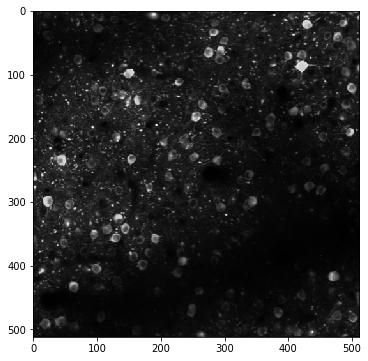

In [21]:
fig = plt.figure(figsize=(6,6))
plt.imshow(max_projection, cmap='gray')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3> 2.3 ROI Masks </h3>
These are all of the segmented masks for cell bodies in this experiment.

</div>

In [22]:
# Note:  this is different from data_set.get_roi_mask !
rois = data_set.get_roi_mask_array()

In [24]:
print(rois.shape)
print("Number of cells:", rois.shape[0])

(174, 512, 512)
Number of cells: 174


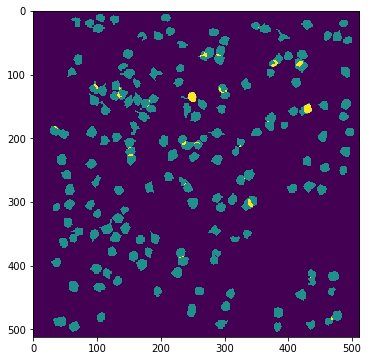

In [25]:
plt.figure(figsize=(6,6))
plt.imshow(rois.sum(axis=0))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3> 2.4 DF/F Traces </h3>
There are a number of accessible traces in the NWB file, including raw fluorescence, neuropil corrected traces, demixed traces, and DF/F traces. 

</div>

In [26]:
ts, dff = data_set.get_dff_traces()

In [27]:
dff.shape

(174, 113888)

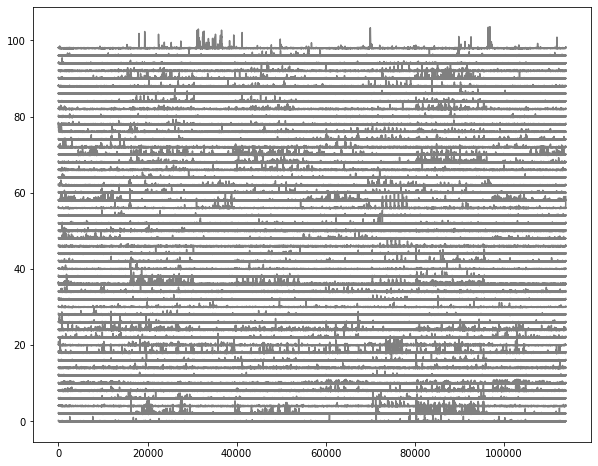

In [28]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i]+(i*2), color='gray')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3> 2.4.1 Extracted event traces </h3>

Instead of dF/F, one might wish to analyze the output of some deconvolution algorithm.  The output of one such algorithm (L0 penalized deconvolution from Jewell & Witten) is available via the SDK.  We refer to the output as "events".  They can be retreived via the `BrainObservatoryCache` object.  Note that they are **not** contained in the dataset object.

</div>

In [29]:
events = boc.get_ophys_experiment_events(session_id)
events.shape

2019-08-09 09:01:29,886 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/739721211


(174, 113888)

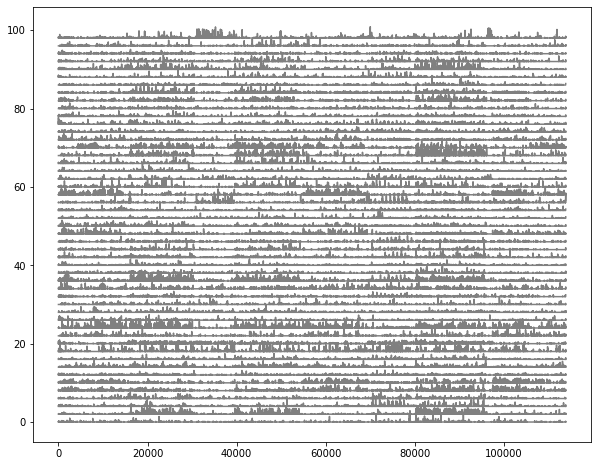

In [30]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(2.5*events[i]+(i*2), color='gray')

> It looks like different cells are active at different times. What could that be about?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3>  2.5 Stimulus epochs </h3>

Several stimuli are shown during each imaging session, interleaved with each other. The stimulus epoch table provides information of these interleaved **stimulus epochs**.

</div>

In [31]:
stim_epoch = data_set.get_stimulus_epoch_table()

In [32]:
stim_epoch

,stimulus,start,end
0,static_gratings,747,15196
1,natural_scenes,16100,30551
2,spontaneous,30701,39581
3,natural_scenes,39582,54050
4,static_gratings,54953,69403
5,natural_movie_one,70307,79338
6,natural_scenes,80241,96126
7,static_gratings,97406,113662


In [33]:
stim_epoch.stimulus.unique()

array(['static_gratings', 'natural_scenes', 'spontaneous',
       'natural_movie_one'], dtype=object)

> Overlay stimulus epochs on the DFF traces

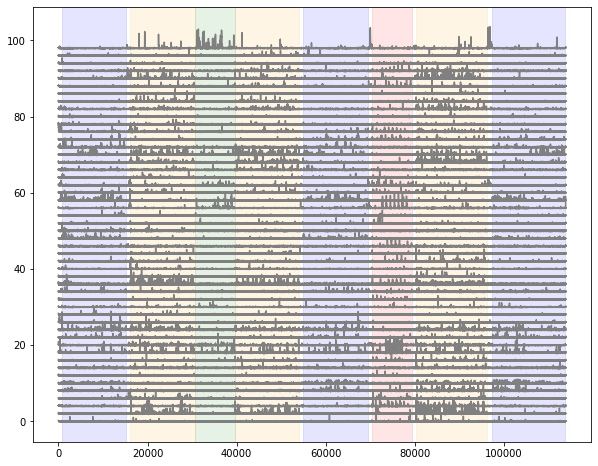

In [34]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#for each stimulus, shade the plot when the stimulus is presented
colors = {'static_gratings':   'blue',
          'natural_scenes':    'orange',
          'spontaneous':       'green',
          'natural_movie_one': 'red'}

for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[stim_name], alpha=0.1)

> Details of stimulus presentation per trial can be found in the **stimulus_table** and the images and movies presented can be found in the **stimulus_template**.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3> 2.6 Stimulus Table </h3>
For each stimulus there is a **stimulus table** with information about the condition and timing of each trial. 

</div>

In [35]:
natural_scene_table = data_set.get_stimulus_table('natural_scenes')

In [36]:
natural_scene_table.head()

,frame,start,end
0,81,16100,16107
1,33,16108,16115
2,76,16115,16122
3,13,16123,16130
4,56,16130,16137


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3> 2.7 Stimulus Template </h3>

The images and movies presented during the session area also included in the NWB file as the **stimulus template**. Stimuli that are generated programmatically (eg. drifting and static gratings) do not have a stimulus template. There are tools in the SDK to recreate these stimuli.

</div>

In [37]:
natural_scene_template = data_set.get_stimulus_template('natural_scenes')

In [38]:
natural_scene_template.shape

(118, 918, 1174)

> Look at the scene presented for the fourth trial

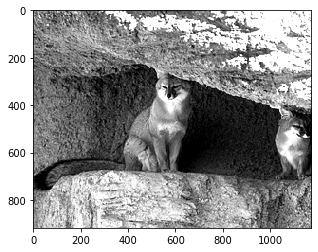

In [39]:
scene_number = natural_scene_table.frame.iloc[3]
plt.imshow(natural_scene_template[scene_number,:,:], cmap='gray')

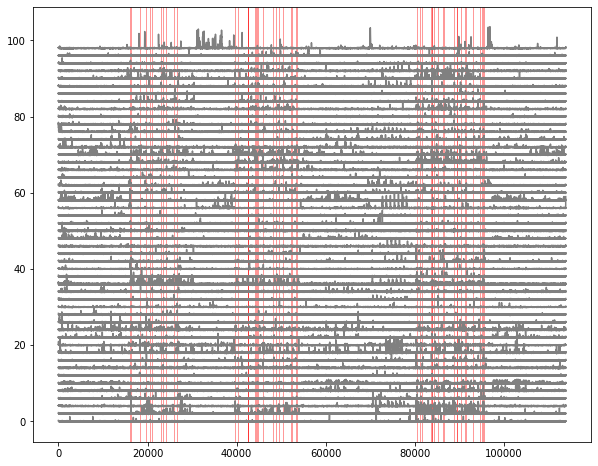

In [40]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#shade traces with the time of each presentation of the above scene
stim_subset = natural_scene_table[natural_scene_table.frame==scene_number]
for j in range(len(stim_subset)):
    plt.axvspan(xmin=stim_subset.start.iloc[j], xmax=stim_subset.end.iloc[j], color='red', alpha=0.4)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3> 2.8 Running speed </h3>

The running speed of the animal on the rotating disk during the entire session is available.

</div>

In [41]:
dxcm, tsd = data_set.get_running_speed()

Text(0.5, 0, 'acquisition frame')

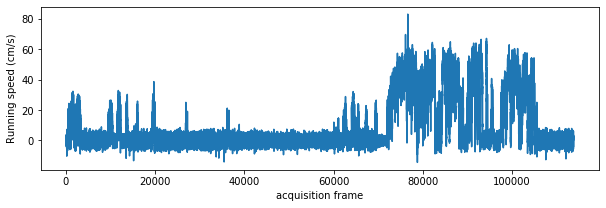

In [42]:
fig = plt.figure(figsize=(10,3))
plt.plot(dxcm)
plt.ylabel("Running speed (cm/s)")
plt.xlabel("acquisition frame")

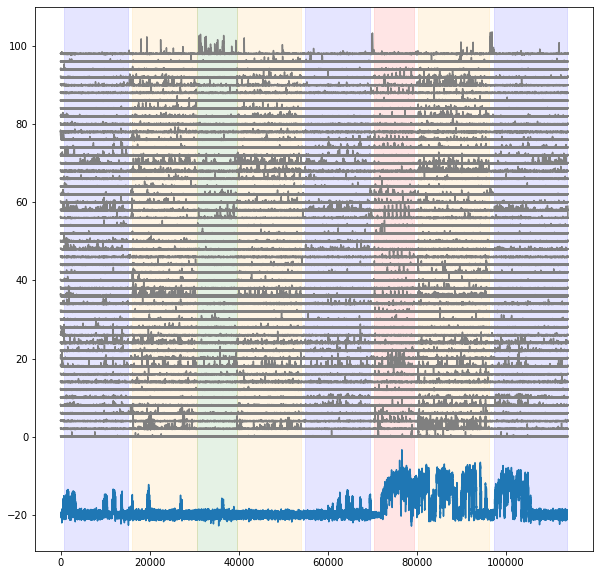

In [43]:
fig = plt.figure(figsize=(10,10))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
plt.plot((0.2*dxcm)-20)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> 3. Finding data for specific cells. </h2>

The `Cell Specimens Table` is a table of metadata and derived metrics computed for each ROI in the entire dataset. This is accessible for direct download from the website and through the sdk.

</div>

In [44]:
cell_specimens = pd.DataFrame(boc.get_cell_specimens())

In [45]:
cell_specimens.shape

(63251, 60)

In [46]:
cell_specimens.head()

,all_stim,area,cell_specimen_id,donor_full_genotype,dsi_dg,experiment_container_id,failed_experiment_container,g_dsi_dg,g_osi_dg,g_osi_sg,...,specimen_id,tfdi_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name
0,False,VISp,517397327,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511498742,False,NaN,NaN,NaN,...,502185555,NaN,NaN,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
1,False,VISp,517397340,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,1.461268,511498742,False,0.824858,0.901542,NaN,...,502185555,0.333074,NaN,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
2,False,VISp,517397343,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511498742,False,0.812462,0.894923,NaN,...,502185555,0.258131,NaN,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3,False,VISp,517397347,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511498742,False,0.078742,0.109241,NaN,...,502185555,0.231590,NaN,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
4,False,VISp,517397353,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511498742,False,NaN,NaN,NaN,...,502185555,NaN,NaN,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)


> There are 60 columns in this dataframe. Some are metadata, including experiment id, cell_specimen_id, Cre line, targeted area, etc. Others are derived metrics including orientation selectivity, preferred stimulus conditions, receptive field size and location, response reliability, etc. The details on how these are computed are in the White Paper in the `Documentation` Tab on the website. 

In [47]:
cell_specimens.keys()

Index(['all_stim', 'area', 'cell_specimen_id', 'donor_full_genotype', 'dsi_dg',
       'experiment_container_id', 'failed_experiment_container', 'g_dsi_dg',
       'g_osi_dg', 'g_osi_sg', 'image_sel_ns', 'imaging_depth', 'osi_dg',
       'osi_sg', 'p_dg', 'p_ns', 'p_run_mod_dg', 'p_run_mod_ns',
       'p_run_mod_sg', 'p_sg', 'peak_dff_dg', 'peak_dff_ns', 'peak_dff_sg',
       'pref_dir_dg', 'pref_image_ns', 'pref_ori_sg', 'pref_phase_sg',
       'pref_sf_sg', 'pref_tf_dg', 'reliability_dg', 'reliability_nm1_a',
       'reliability_nm1_b', 'reliability_nm1_c', 'reliability_nm2',
       'reliability_nm3', 'reliability_ns', 'reliability_sg',
       'rf_area_off_lsn', 'rf_area_on_lsn', 'rf_center_off_x_lsn',
       'rf_center_off_y_lsn', 'rf_center_on_x_lsn', 'rf_center_on_y_lsn',
       'rf_chi2_lsn', 'rf_distance_lsn', 'rf_overlap_index_lsn', 'run_mod_dg',
       'run_mod_ns', 'run_mod_sg', 'sfdi_sg', 'specimen_id', 'tfdi_dg',
       'time_to_peak_ns', 'time_to_peak_sg', 'tld1_id', 'tld1

> Let's find the cells from our experiment above

In [48]:
subset = cell_specimens[cell_specimens.experiment_container_id==experiment_container_id]

In [49]:
len(subset)

225

> Why are there more cells than we saw in the ROI masks above? (HINT: check your handout)
>
> Let's look at the cells in this experiment that have image #22 (below) as their preferred image.

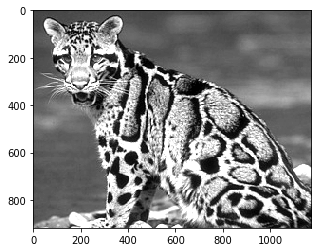

In [50]:
plt.imshow(natural_scene_template[22,:,:], cmap='gray')

In [51]:
subset[(subset.p_ns<0.05)&(subset.pref_image_ns==22)].cell_specimen_id

4933     517472708
4952     517472807
5150     517474078
28643    587377366
Name: cell_specimen_id, dtype: int64

> Plot the responses for one of these cells along with the times image 22 was shown.

In [52]:
# get the numpy index for a specific cell id
cell_index = data_set.get_cell_specimen_indices([587377366])[0]

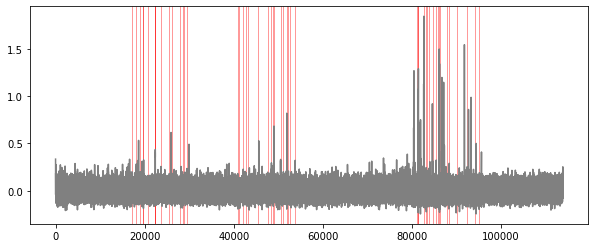

In [53]:
fig = plt.figure(figsize=(10,4))
plt.plot(dff[cell_index,:], color='gray')
    
#shade traces with the time of each presentation of the above scene
stim_subset = natural_scene_table[natural_scene_table.frame==22]
for j in range(len(stim_subset)):
    plt.axvspan(xmin=stim_subset.start.iloc[j], xmax=stim_subset.end.iloc[j], color='red', alpha=0.4)

> Plot the dF/F traces for the individual trials during which image 22 was shown.

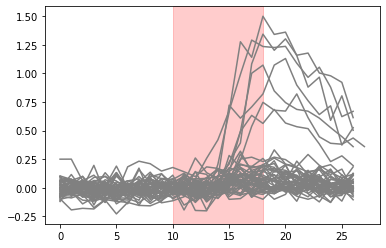

In [54]:
stim_subset = natural_scene_table[natural_scene_table.frame==22]
for i in range(len(stim_subset)):
    plt.plot(dff[cell_index,stim_subset.start.iloc[i]-10:stim_subset.end.iloc[i]+10], color='gray')
plt.axvspan(10,18, color='red',alpha=0.2)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> 4. (BONUS!) Accessing calcium movies.</h2>

If you accessing the data on AWS, you can find the files for the calcium data (more precisely, the motion corrected calcium movies).  Here is an example piece of code that shows the beginning of the experiment we've been looking at.

</div>

In [55]:
import h5py
from matplotlib import animation, rc
from IPython.display import HTML

In [56]:
raw_data_dir = '/data/allen-brain-observatory/visual-coding-2p/ophys_movies/'

In [57]:
def get_raw_data_path(session_id):
    return os.path.join(raw_data_dir, 'ophys_experiment_'+str(session_id)+'.h5')

exp_path = get_raw_data_path(session_id)

In [ ]:
raw_data = h5py.File(exp_path, 'r')
raw_data['data']

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(raw_data['data'][0])
ax.axis('off')

def init():
    im.set_data(raw_data['data'][0])
    return (im,)

def animate(i):
    im.set_data(raw_data['data'][i])
    return (im,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=30, interval=1000./30, blit=True)

In [ ]:
HTML(anim.to_jshtml())